In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [54]:
df = pd.get_dummies(df, drop_first=True)

In [55]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [56]:
x = df.drop(columns=["charges"])
y = df["charges"]

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [61]:
y_pred = model.predict(x_test)

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
mae = mean_absolute_error(y_test, y_pred)
mae

2695.0554405237203

In [64]:
mse = mean_squared_error(y_test,y_pred)
mse

23458053.354898196

In [65]:
r2 = r2_score(y_test, y_pred)
r2

0.8500781905830158

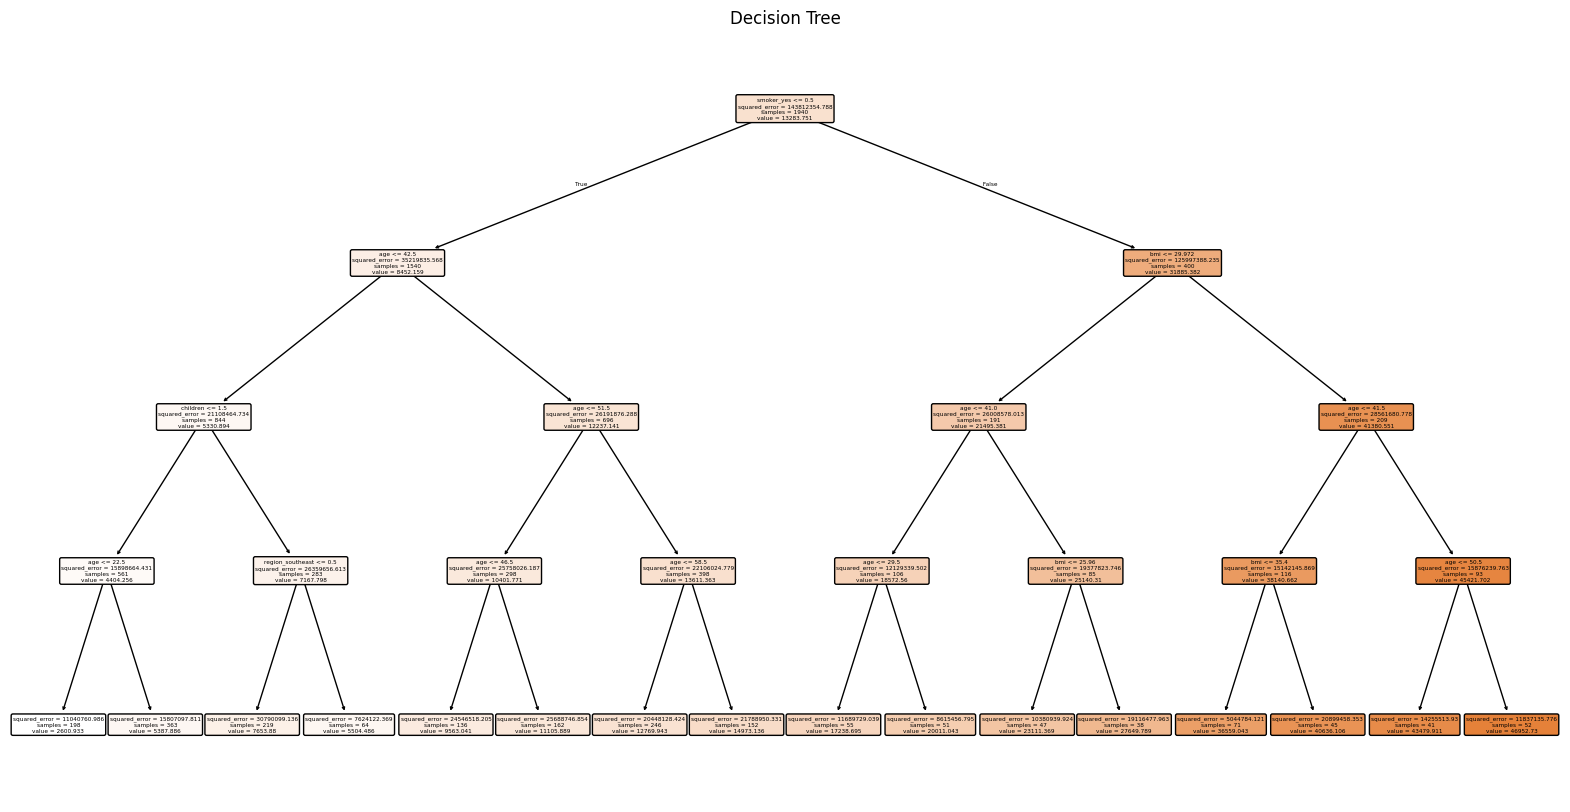

In [66]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=x.columns, filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

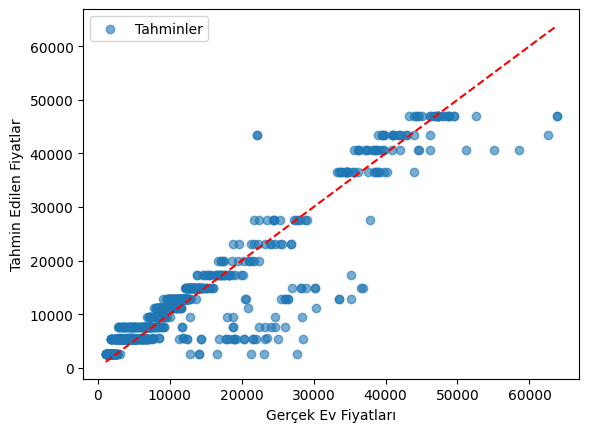

In [68]:
import matplotlib.pyplot as plot

plot.scatter(y_test, y_pred, label="Tahminler", alpha=0.6)
plot.xlabel("Gerçek Ev Fiyatları")
plot.ylabel("Tahmin Edilen Fiyatlar")
plot.legend()

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plot.plot([min_val,max_val], [min_val,max_val],color="red", linestyle="--")

plot.show()

In [ ]:
##Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(x_train, y_train)

In [ ]:
y_pred2 = model2.predict(x_test)

In [ ]:
mae2 = mean_absolute_error(y_test, y_pred2)
mae2

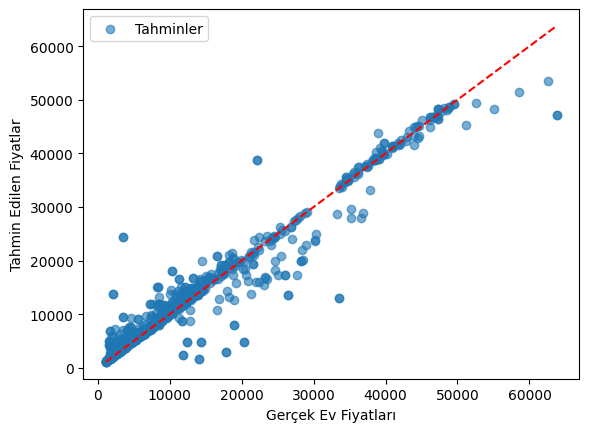

In [69]:
import matplotlib.pyplot as plot

plot.scatter(y_test, y_pred2, label="Tahminler", alpha=0.6)
plot.xlabel("Gerçek Ev Fiyatları")
plot.ylabel("Tahmin Edilen Fiyatlar")
plot.legend()

min_val = min(y_test.min(), y_pred2.min())
max_val = max(y_test.max(), y_pred2.max())

plot.plot([min_val,max_val], [min_val,max_val],color="red", linestyle="--")

plot.show()